In [72]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

In [73]:
DATA_train= "/Users/parasgurung/Desktop/Dataset/Train"
CATEGORIES = ["character_1_ka","character_2_kha","character_3_ga","character_4_gha","character_5_kna","character_6_cha","character_7_chha","character_8_ja","character_9_jha","character_10_yna","character_11_taamatar","character_12_thaa","character_13_daa","character_14_dhaa","character_15_adna","character_16_tabala","character_17_tha","character_18_da","character_19_dha","character_20_na","character_21_pa","character_22_pha","character_23_ba","character_24_bha","character_25_ma","character_26_yaw","character_27_ra","character_28_la","character_29_waw","character_30_motosaw","character_31_petchiryasaw","character_32_patalosaw","character_33_ha","character_34_chhya","character_35_tra","character_36_gya","digit_0","digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"]
DATA_test= "/Users/parasgurung/Desktop/Dataset/Test"


In [75]:
print(img_array.shape)

(32, 32)


In [95]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # characters

        path = os.path.join(DATA_train,category)  # create path to characters
        class_num = CATEGORIES.index(category)  # get the classification

        for img in tqdm(os.listdir(path)):  # iterate over each image per categories
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))



100%|██████████| 1700/1700 [00:00<00:00, 2794.21it/s]

78200


In [96]:
testing_data=[]
def create_testing_data():
    for category in CATEGORIES:  # characters

        path = os.path.join(DATA_test,category)  # create path to characters
        class_num = CATEGORIES.index(category)  # get the classification

        for img in tqdm(os.listdir(path)):  # iterate over each image per categories
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                
                testing_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_testing_data()

print(len(testing_data))

100%|██████████| 300/300 [00:00<00:00, 2223.56it/s]

13800


In [97]:
#shuffling the data
random.shuffle(training_data)
random.shuffle(testing_data)

In [101]:
#making x and y array and adding the features and labels to it for training data
X_train = []
y_train = []
IMG_SIZE=32
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)


In [1]:
#making x and y array and adding the features and labels to it for testing data
X_test = []
y_test = []
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)


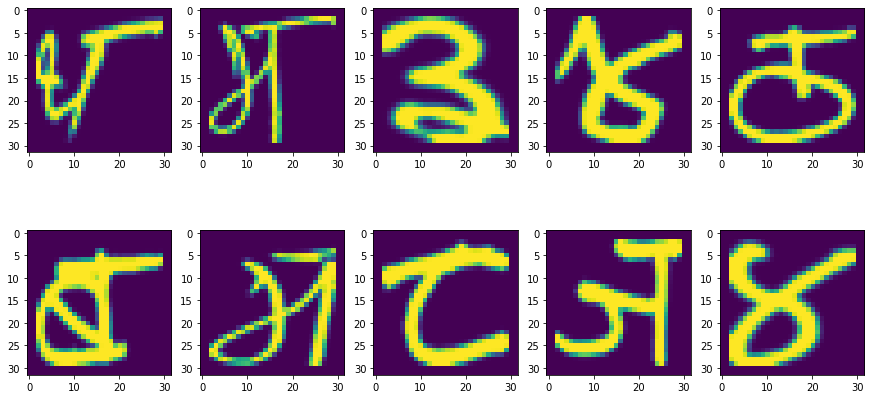

Labels : [41, 6, 10, 42, 12]
Labels : [32, 9, 9, 39, 42]


In [103]:
#plotting the fist 10 images of training dataset
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(X_train[i], interpolation='none')
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(X_train[i+6], interpolation='none')
plt.show()

print("Labels : {}".format(y[0:]))
print("Labels : {}".format(y[6:11]))


In [104]:
import pickle
#save data by pickle module
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()